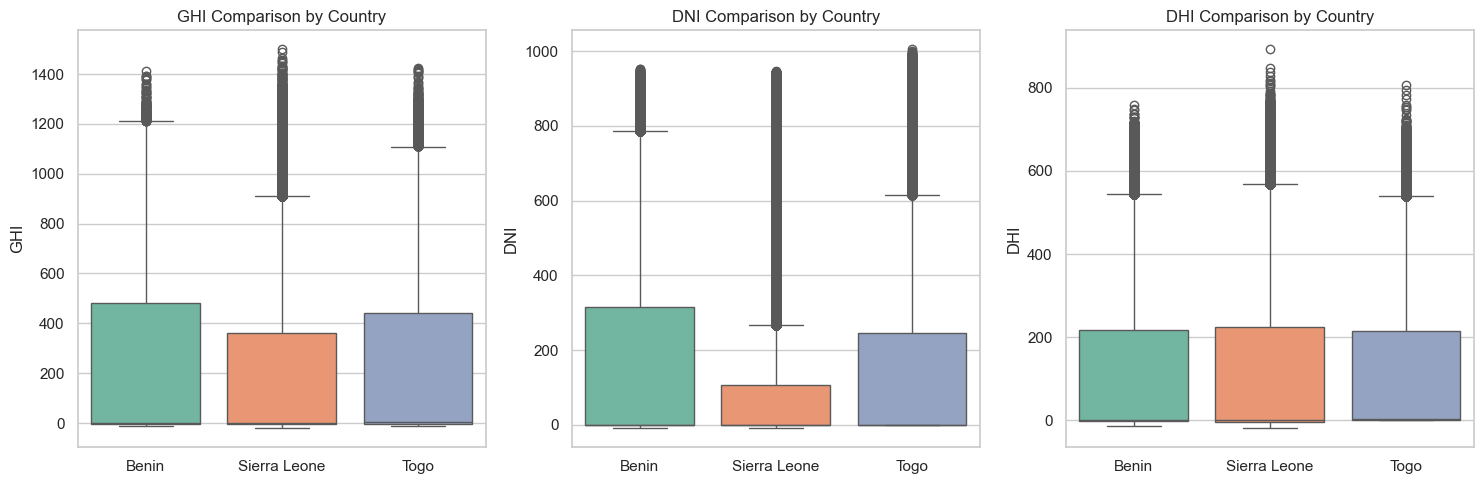

Summary Table: Mean, Median, and Std Dev of GHI, DNI, DHI by Country


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------
# 1. Load each country’s cleaned CSV
# -----------------------------------
benin = pd.read_csv("../data/benin-malanville_clean.csv")
sierra_leone = pd.read_csv("../data/sierraleone-bumbuna_clean.csv")
togo = pd.read_csv("../data/togo-dapaong_qc_clean.csv")

# Add a country column to each dataframe
benin["Country"] = "Benin"
sierra_leone["Country"] = "Sierra Leone"
togo["Country"] = "Togo"

# Combine all countries into one dataframe
df = pd.concat([benin, sierra_leone, togo], ignore_index=True)

# -----------------------------------
# 2. Metric Comparison
# -----------------------------------

# --- Boxplots for GHI, DNI, DHI ---
metrics = ["GHI", "DNI", "DHI"]
plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="Country", y=metric, data=df, hue="Country", palette="Set2", legend=False)

    plt.title(f"{metric} Comparison by Country")
    plt.xlabel("")
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

# --- Summary Table ---
summary_table = (
    df.groupby("Country")[["GHI", "DNI", "DHI"]]
    .agg(["mean", "median", "std"])
    .round(2)
)

print("Summary Table: Mean, Median, and Std Dev of GHI, DNI, DHI by Country")
display(summary_table)


In [25]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway, kruskal

# Separate GHI values for each country
ghi_benin = df[df["Country"] == "Benin"]["GHI"]
ghi_sierra_leone = df[df["Country"] == "Sierra Leone"]["GHI"]
ghi_togo = df[df["Country"] == "Togo"]["GHI"]

# -----------------------------------
# One-way ANOVA (for normally distributed data)
# -----------------------------------
anova_stat, anova_p = f_oneway(ghi_benin, ghi_sierra_leone, ghi_togo)
print("One-way ANOVA results:")
print(f"F-statistic = {anova_stat:.3f}, p-value = {anova_p:.4f}")

# -----------------------------------
# Kruskal–Wallis Test (non-parametric alternative)
# -----------------------------------
kw_stat, kw_p = kruskal(ghi_benin, ghi_sierra_leone, ghi_togo)
print("\nKruskal–Wallis Test results:")
print(f"H-statistic = {kw_stat:.3f}, p-value = {kw_p:.4f}")

# -----------------------------------
# Interpretation
# -----------------------------------
if anova_p < 0.05 or kw_p < 0.05:
    print("\n The differences in GHI between countries are statistically significant (p < 0.05).")
else:
    print("\n No significant difference in GHI values between countries (p ≥ 0.05).")


One-way ANOVA results:
F-statistic = 2090.093, p-value = 0.0000

Kruskal–Wallis Test results:
H-statistic = 4524.883, p-value = 0.0000

 The differences in GHI between countries are statistically significant (p < 0.05).


### **Key Observations**

* **Benin** shows the **highest average GHI and DNI values** among the three countries, indicating generally stronger solar resource availability overall.
* **Sierra Leone** consistently has the **lowest averages** across GHI, DNI, and DHI while also showing **comparable or higher variability**, suggesting less stable solar intensity conditions.
* **Togo** tends to fall **in between Benin and Sierra Leone** in terms of average values, but its variability levels for all three indicators are **relatively moderate and stable**, making it more predictable than Sierra Leone.



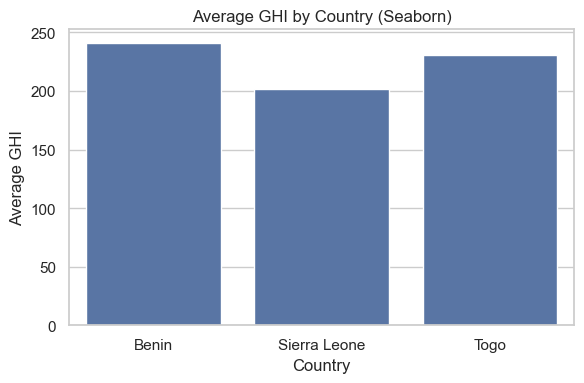

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

avg_values = {
    'Benin': 240.56,
    'Sierra Leone': 201.96,
    'Togo': 230.56
}

# Convert to DataFrame format for Seaborn
import pandas as pd
df_avg = pd.DataFrame({
    "Country": list(avg_values.keys()),
    "Average_GHI": list(avg_values.values())
})

plt.figure(figsize=(6,4))
sns.barplot(data=df_avg, x="Country", y="Average_GHI")
plt.xlabel("Country")
plt.ylabel("Average GHI")
plt.title("Average GHI by Country (Seaborn)")
plt.tight_layout()
plt.show()
